In [17]:
import re
import sys
import numpy as np
import gzip
import json
import itertools
from collections import defaultdict

import nltk
import networkx as nx
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')

WORKING_DIR = 'drive/MyDrive/dtsa5800_tweets_network_analysis'
DATA_DIR = f'{WORKING_DIR}/data'
DATA_FILE = f'{DATA_DIR}/nikelululemonadidas_tweets.jsonl.gz'

## Semantic Network Graph

In [2]:
tweets = {}
with gzip.open(DATA_FILE, 'r') as f:
    for i, line in enumerate(f):
        tweet = json.loads(line)
        tweet_id =tweet.get('id', i)
        text = tweet.get('full_text') or tweet.get('text' or '')
        tweets[str(tweet_id)] = text

len(tweets)

175077

In [26]:
STOPWORDS = set(nltk.corpus.stopwords.words('english')).union({'http', 'via', 'get', 'one', 'three', 'let', 'thee', 'dear'})
LEMMATIZER = nltk.stem.WordNetLemmatizer()
TTOKENIZER = nltk.tokenize.TweetTokenizer()

def process_text(text, min_length=3, remove_mentions=False, remove_hashtags=False):

    tokens = TTOKENIZER.tokenize(text.lower())
    tokens = [t for t in tokens if not t.startswith(("http://", "https://"))]

    if remove_mentions:
        tokens = [t for t in tokens if '@' not in t]
    if remove_hashtags:
        tokens = [t for t in tokens if '#' not in t]

    processed_tokens = []
    for token in tokens:
        sub_tokens = re.findall(r'[a-zA-Z]+', token)
        for sub_token in sub_tokens:
            lem_token = LEMMATIZER.lemmatize(sub_token)
            if lem_token not in STOPWORDS and len(lem_token) >= min_length:
                processed_tokens.append(lem_token)

    return processed_tokens


In [4]:
N = 30
processed_tweets = {}
word_counts = defaultdict(int)

for tweet_id, text in tweets.items():
    tokens = process_text(text)
    processed_tweets[tweet_id] = tokens
    for word in tokens:
        word_counts[word] += 1

sorted_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
sorted_words = [word for word, count in sorted_counts]
top_words = sorted_words[:N]
print(top_words)

['nike', 'adidas', 'xbox', 'sneakerscouts', 'eneskanter', 'day', 'available', 'air', 'china', 'kingjames', 'together', 'nikestore', 'jumpman', 'win', 'try', 'austinekeler', 'book', 'knight', 'phil', 'owner', 'fly', 'ticket', 'adidasfballus', 'finishline', 'plane', 'xboxsweepstakes', 'follow', 'chance', 'kit', 'exclusive']


In [5]:
def build_graph(processed_tokens_dict, selected_words):
    graph = nx.Graph()

    for tweet_id, tokens in processed_tokens_dict.items():
        nodes = [t for t in tokens if t in selected_words]
        cooccurrences = itertools.combinations(nodes, 2)
        graph.add_edges_from(cooccurrences)

    nodes = graph.number_of_nodes()
    edges = graph.number_of_edges()
    print(f"Graph has {nodes} nodes and {edges} edges.")

    return graph

In [6]:
graph1 = build_graph(processed_tweets, top_words)

Graph has 30 nodes and 334 edges.


In [8]:
def draw_network_graph(graph, figsize=(20, 15), node_size=800):
    pos = nx.spring_layout(graph, k=0.15, iterations=20)
    plt.figure(figsize=figsize)
    nx.draw_networkx(graph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=node_size, width=1)
    plt.show()

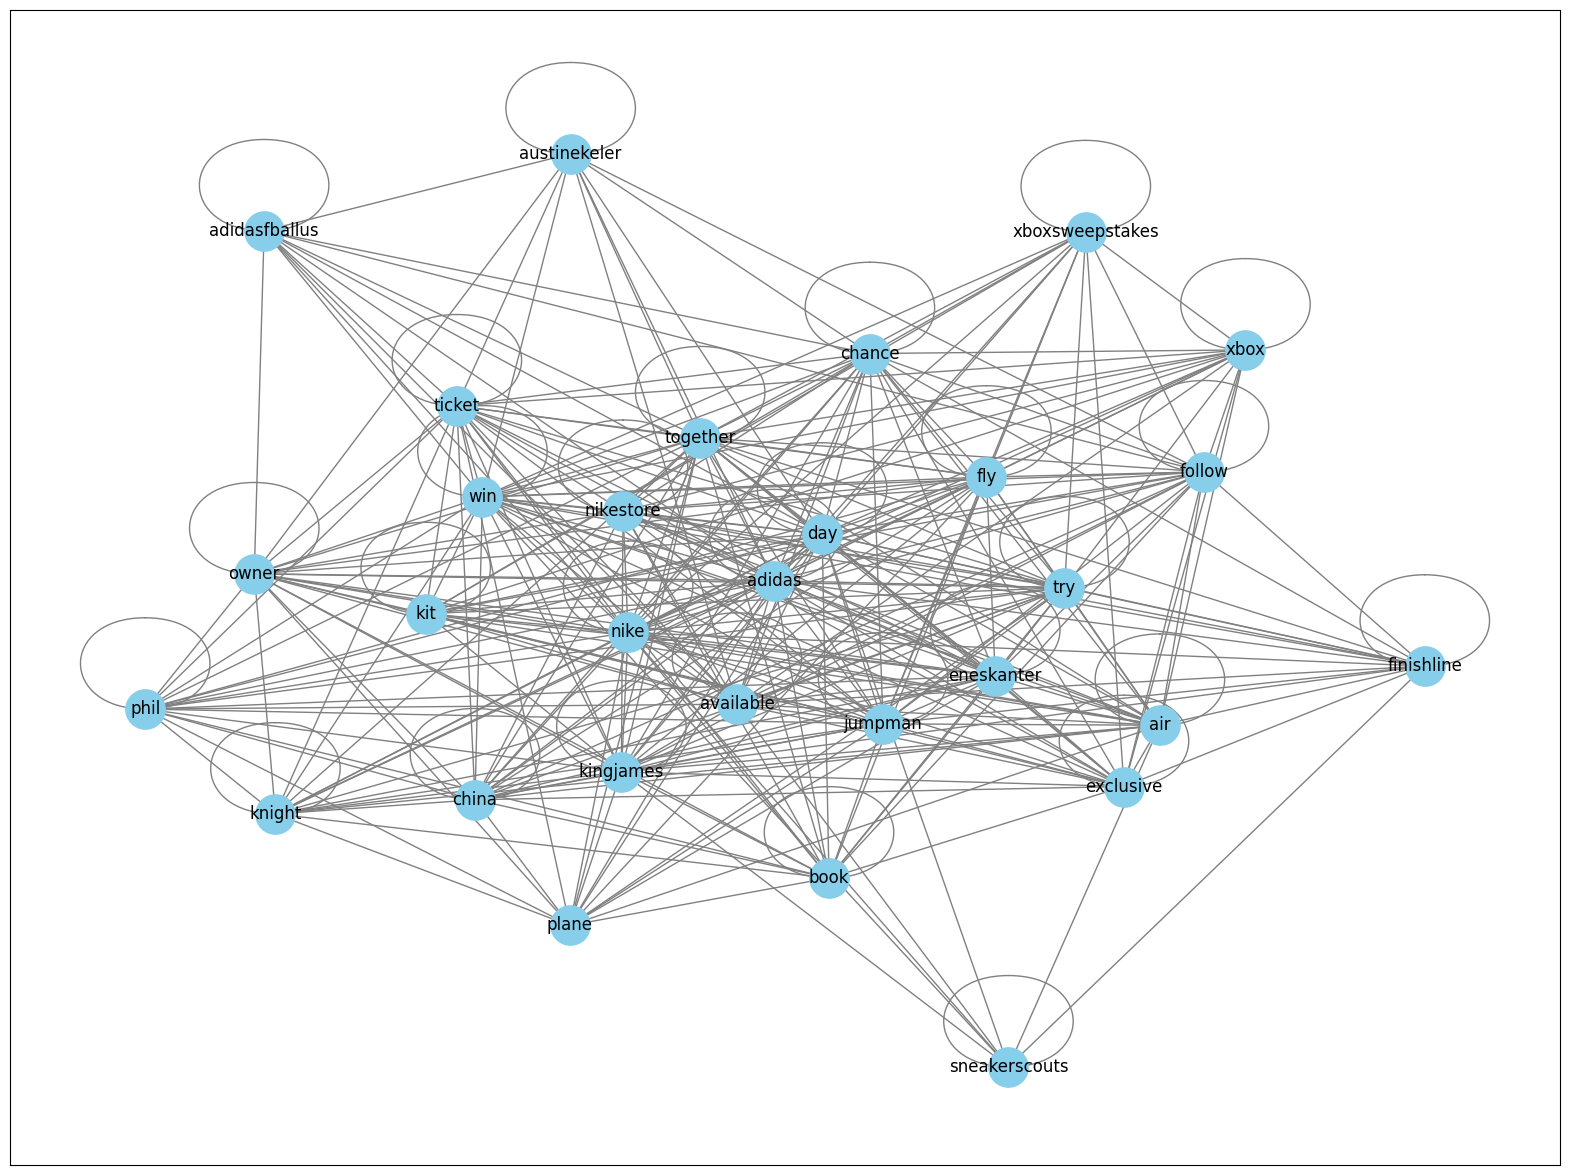

In [9]:
draw_network_graph(graph1)

## Remove mentions and hashtags ,and filter by threshold

In [27]:
N = 100
processed_tweets = {}
word_counts = defaultdict(int)

for tweet_id, text in tweets.items():
    tokens = process_text(text, remove_mentions=True, remove_hashtags=True)
    processed_tweets[tweet_id] = tokens
    for word in tokens:
        word_counts[word] += 1

sorted_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

frequency_threshold_upper = 88
frequency_threshold_lower = 1

upper_limit = np.percentile(list(word_counts.values()), frequency_threshold_upper)
lower_limit = np.percentile(list(word_counts.values()), frequency_threshold_lower)

filtered_sorted_worted = [word for word, count in sorted_counts if lower_limit < count < upper_limit]
top_words = filtered_sorted_worted[:N]
print(top_words)

['understood', 'coral', 'pullover', 'headline', 'trace', 'therapist', 'ass', 'existence', 'prolly', 'template', 'category', 'awhile', 'patch', 'vest', 'reaction', 'unfair', 'ave', 'demanding', 'sight', 'rarely', 'remain', 'obesity', 'wider', 'financially', 'esp', 'nephew', 'garden', 'encourage', 'postponed', 'therapy', 'slip', 'internal', 'fabulous', 'bound', 'eating', 'disgrace', 'asia', 'motivation', 'understands', 'nature', 'democracy', 'drafted', 'nashville', 'timeline', 'spoken', 'settle', 'retired', 'drawn', 'employer', 'stream', 'tokyo', 'uncomfortable', 'focusing', 'crown', 'scamming', 'collecting', 'entertainment', 'bob', 'consequence', 'sacrifice', 'village', 'ekeler', 'budget', 'cricket', 'slaughter', 'amm', 'fut', 'vampire', 'kiko', 'regional', 'cementing', 'pewter', 'graduating', 'tuff', 'hawk', 'trained', 'expose', 'asf', 'somethin', 'dis', 'supa', 'illustration', 'emission', 'photographer', 'globe', 'verify', 'systemic', 'converse', 'wasting', 'desperate', 'protesting', 

In [28]:
graph2 = build_graph(processed_tweets, top_words)

Graph has 58 nodes and 59 edges.


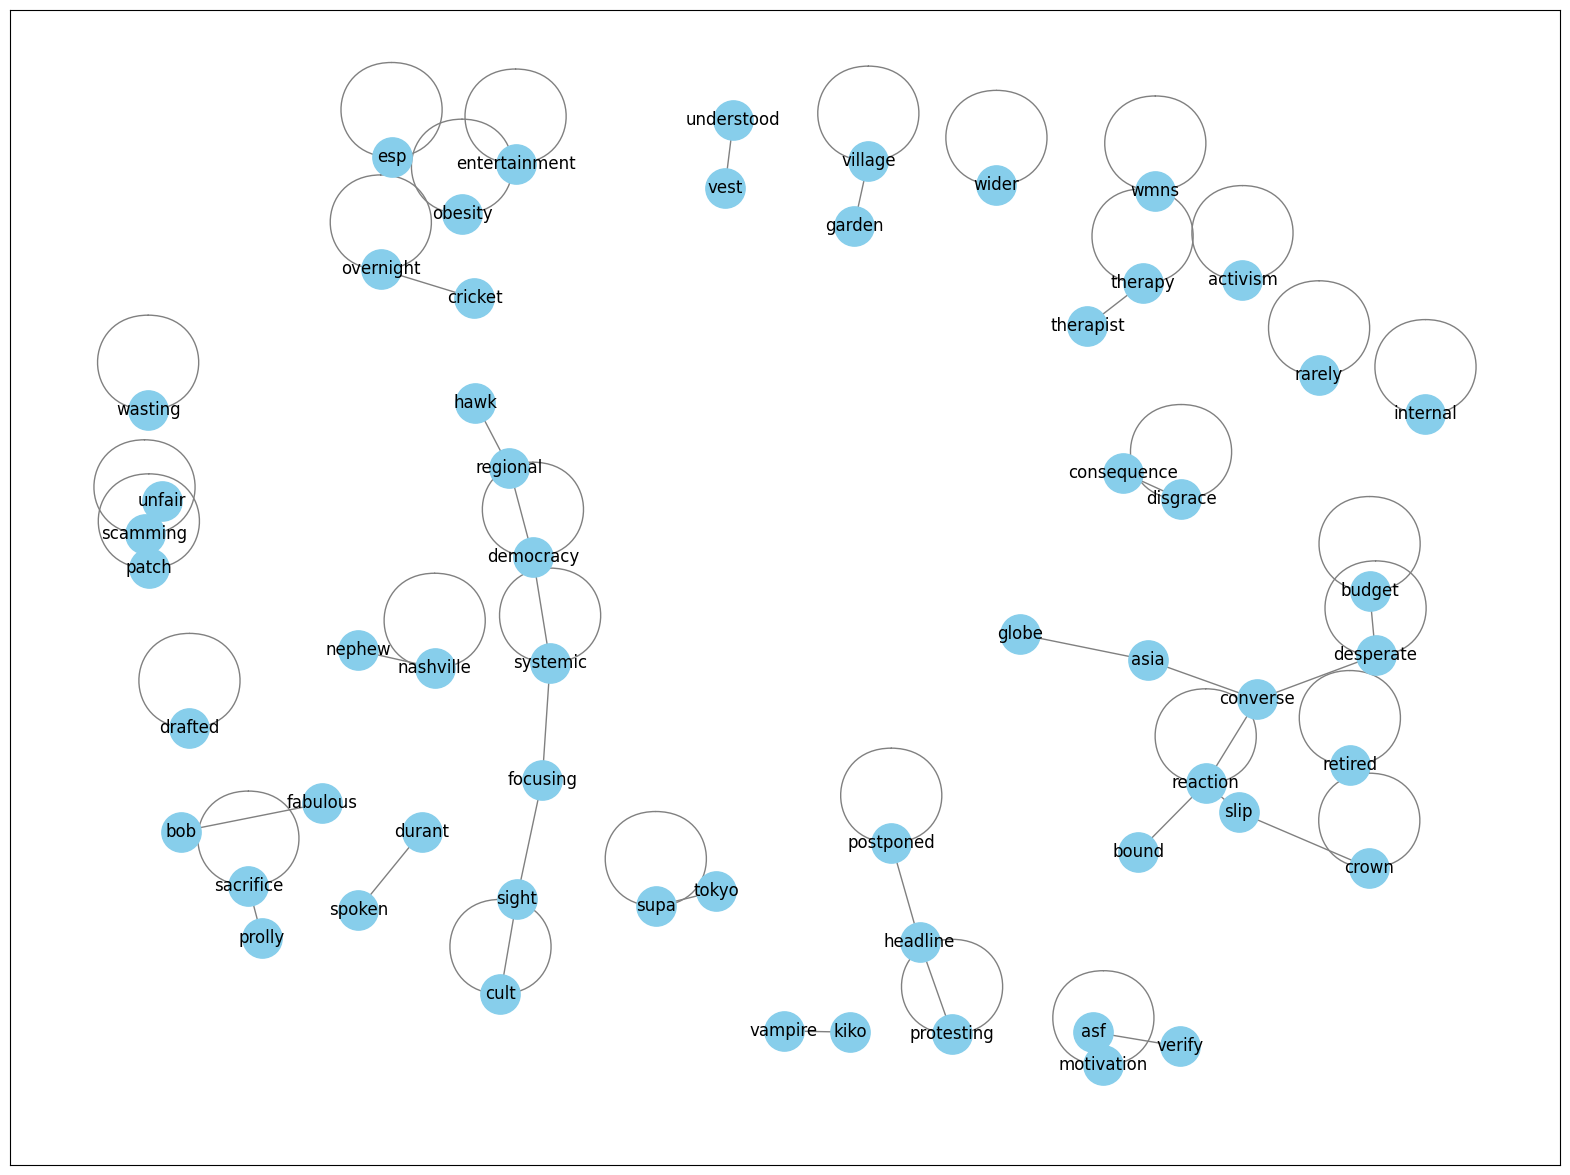

In [21]:
draw_network_graph(graph2)